# Algoritam K najbližih susjeda

Algoritam K najbližih susjeda, poznatiji pod engleskom skraćenicom KNN (k nearest neighbors) je primjer neparametarskog klasifikacijskog algoritma. Sam prinicp rada je vrlo intuitivan te prati princip "s kim si takav si". Alogirtam na temelju udaljenosti između točaka pronalazi k najbližih te zatim dodjeljuje onu oznaku klase koju ima većina najbližih susjeda.

Neparametarski algoritmi su alogritmi koji ne pretpostavljaju nikakvu vezu između vektora značajki i oznaka. Prisjetite se linearne i logističke regresije, oni pretpostavljaju oblik funkcije koja preslikava značajke u oznake, te zatim optimiziraju parametre. 

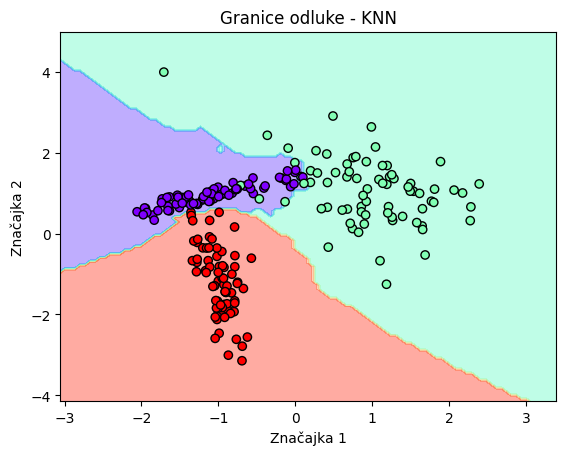

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_classes=3,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

def plot_decision_boundaries(X, y, model, scaler=None, title="Granice odluke - KNN"):
    X = X.astype(float)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    if scaler is not None:
        grid = scaler.transform(grid)
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.rainbow)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.rainbow)
    plt.title(title)
    plt.xlabel("Značajka 1")
    plt.ylabel("Značajka 2")

plot_decision_boundaries(X_train, y_train, knn)


<class 'numpy.ndarray'>
int64


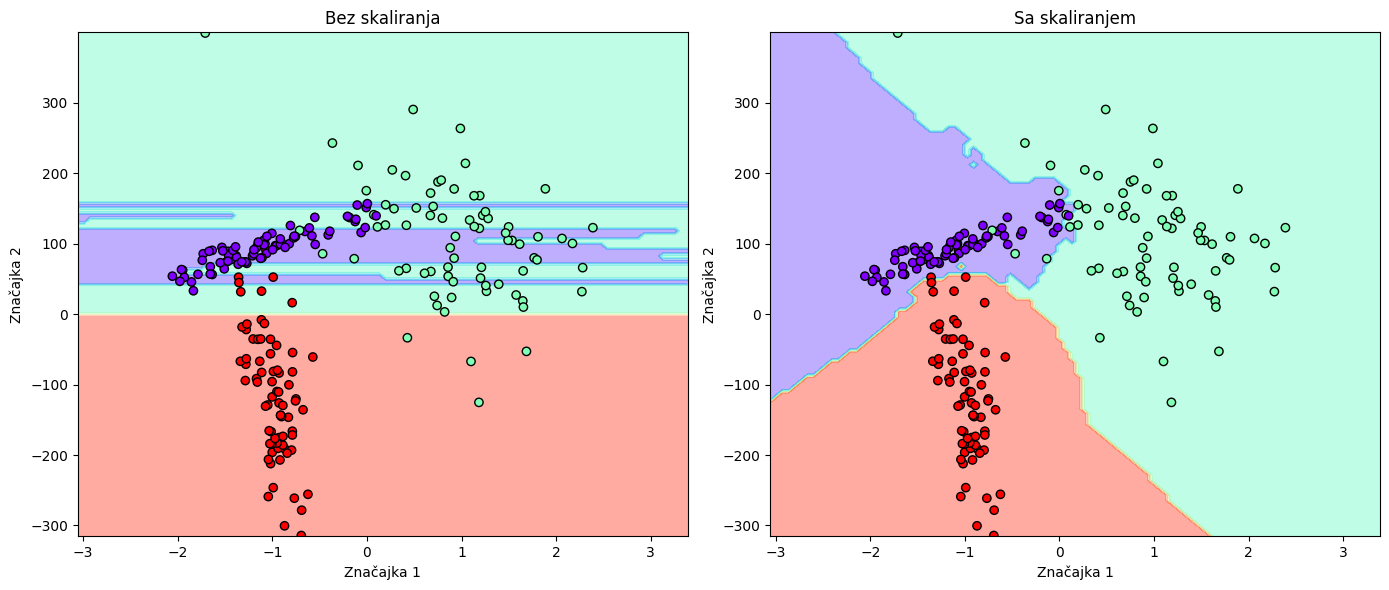

Točnost bez skaliranja: 0.75
Točnost sa skaliranjem: 0.95


In [13]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    n_classes=3,
    random_state=42
)

X[:, 1] *= 100

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
acc_unscaled = accuracy_score(y_test, y_pred_unscaled)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

plt.figure(figsize=(14, 6))

print(type(y))
print(y.dtype if hasattr(y, 'dtype') else X.dtypes)

plt.subplot(1, 2, 1)
plot_decision_boundaries(X_train, y_train, knn_unscaled, title="Bez skaliranja")

plt.subplot(1, 2, 2)
plot_decision_boundaries(X_train, y_train, knn_scaled, title="Sa skaliranjem", scaler=scaler)

plt.tight_layout()
plt.show()

print(f"Točnost bez skaliranja: {acc_unscaled:.2f}")
print(f"Točnost sa skaliranjem: {acc_scaled:.2f}")


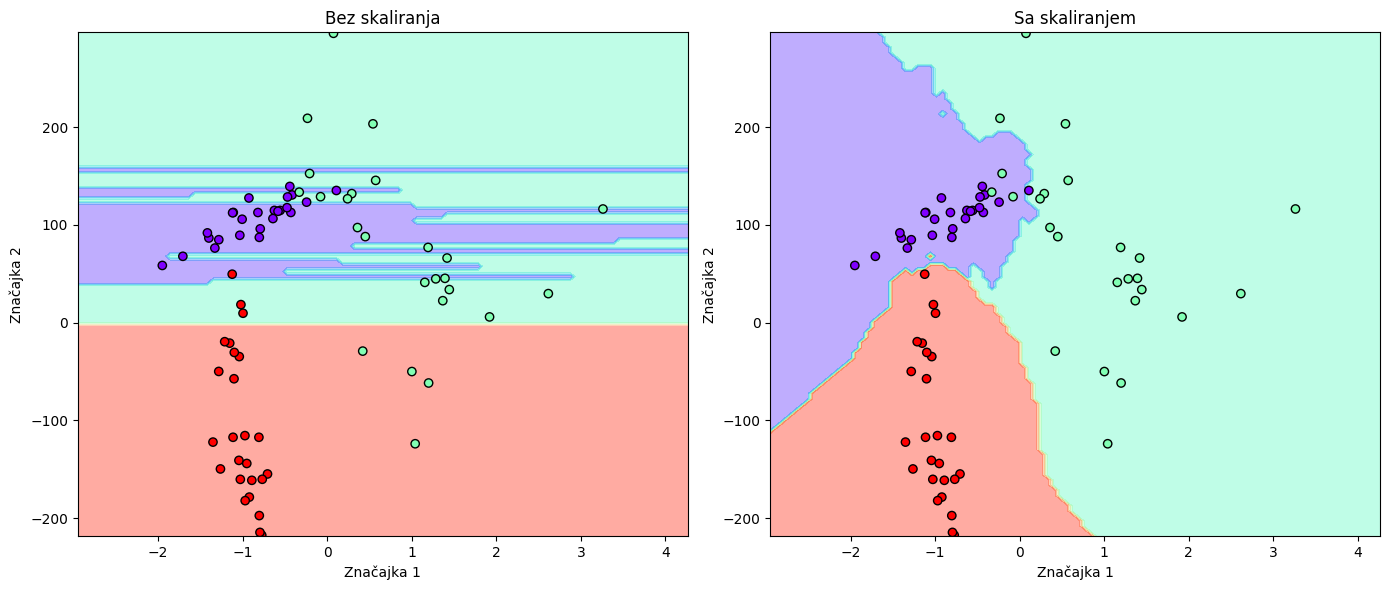

In [14]:
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plot_decision_boundaries(X_test, y_test, knn_unscaled, title="Bez skaliranja")

plt.subplot(1, 2, 2)
plot_decision_boundaries(X_test, y_test, knn_scaled, title="Sa skaliranjem", scaler=scaler)

plt.tight_layout()
plt.show()

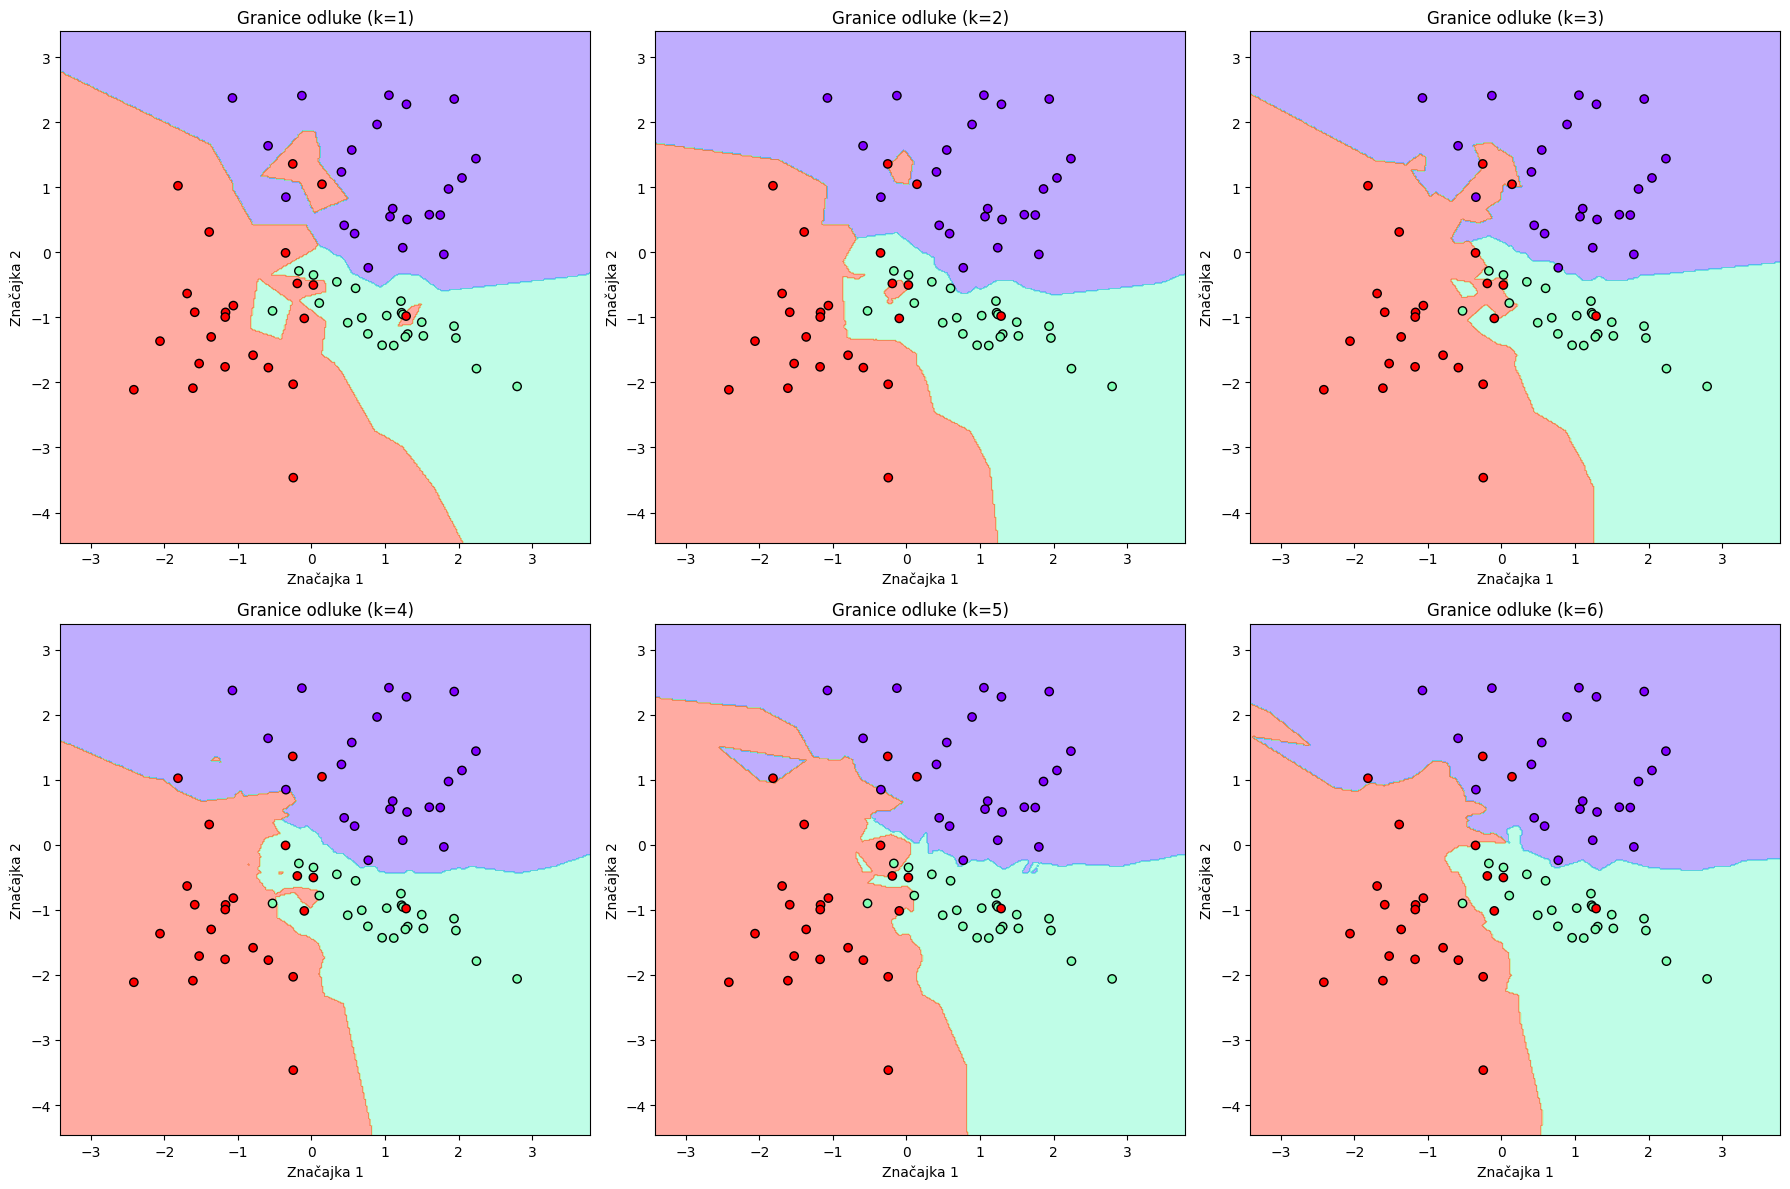

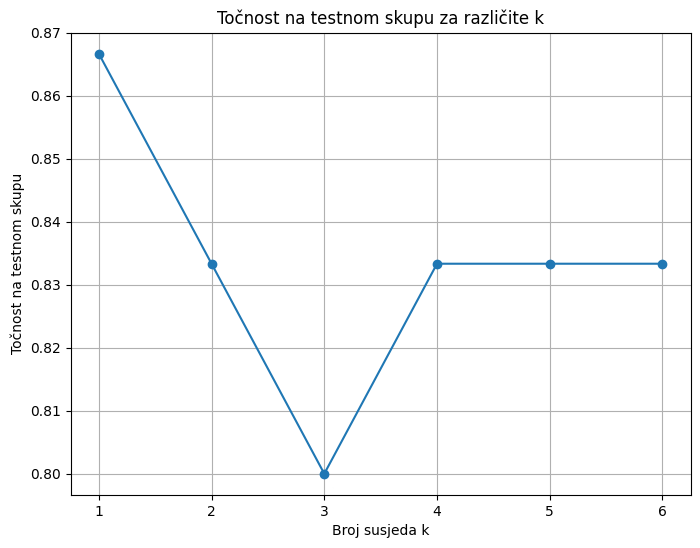

Najbolji k prema točnosti na testnom skupu: 1
Točnost na testnom skupu s najboljim k: 0.867


In [21]:

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           n_classes=3, random_state=412)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=412, stratify=y)

k_values = range(1, 7)
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_scores.append(knn.score(X_test, y_test))

best_k = k_values[np.argmax(test_scores)]

plt.figure(figsize=(18, 12))

for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plt.subplot(2, 3, i)
    plot_decision_boundaries(X_train, y_train, knn, title=f"Granice odluke (k={k})")

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(k_values, test_scores, marker='o')
plt.title("Točnost na testnom skupu za različite k")
plt.xlabel("Broj susjeda k")
plt.ylabel("Točnost na testnom skupu")
plt.xticks(k_values)
plt.grid(True)
plt.show()

print(f"Najbolji k prema točnosti na testnom skupu: {best_k}")
print(f"Točnost na testnom skupu s najboljim k: {test_scores[np.argmax(test_scores)]:.3f}")


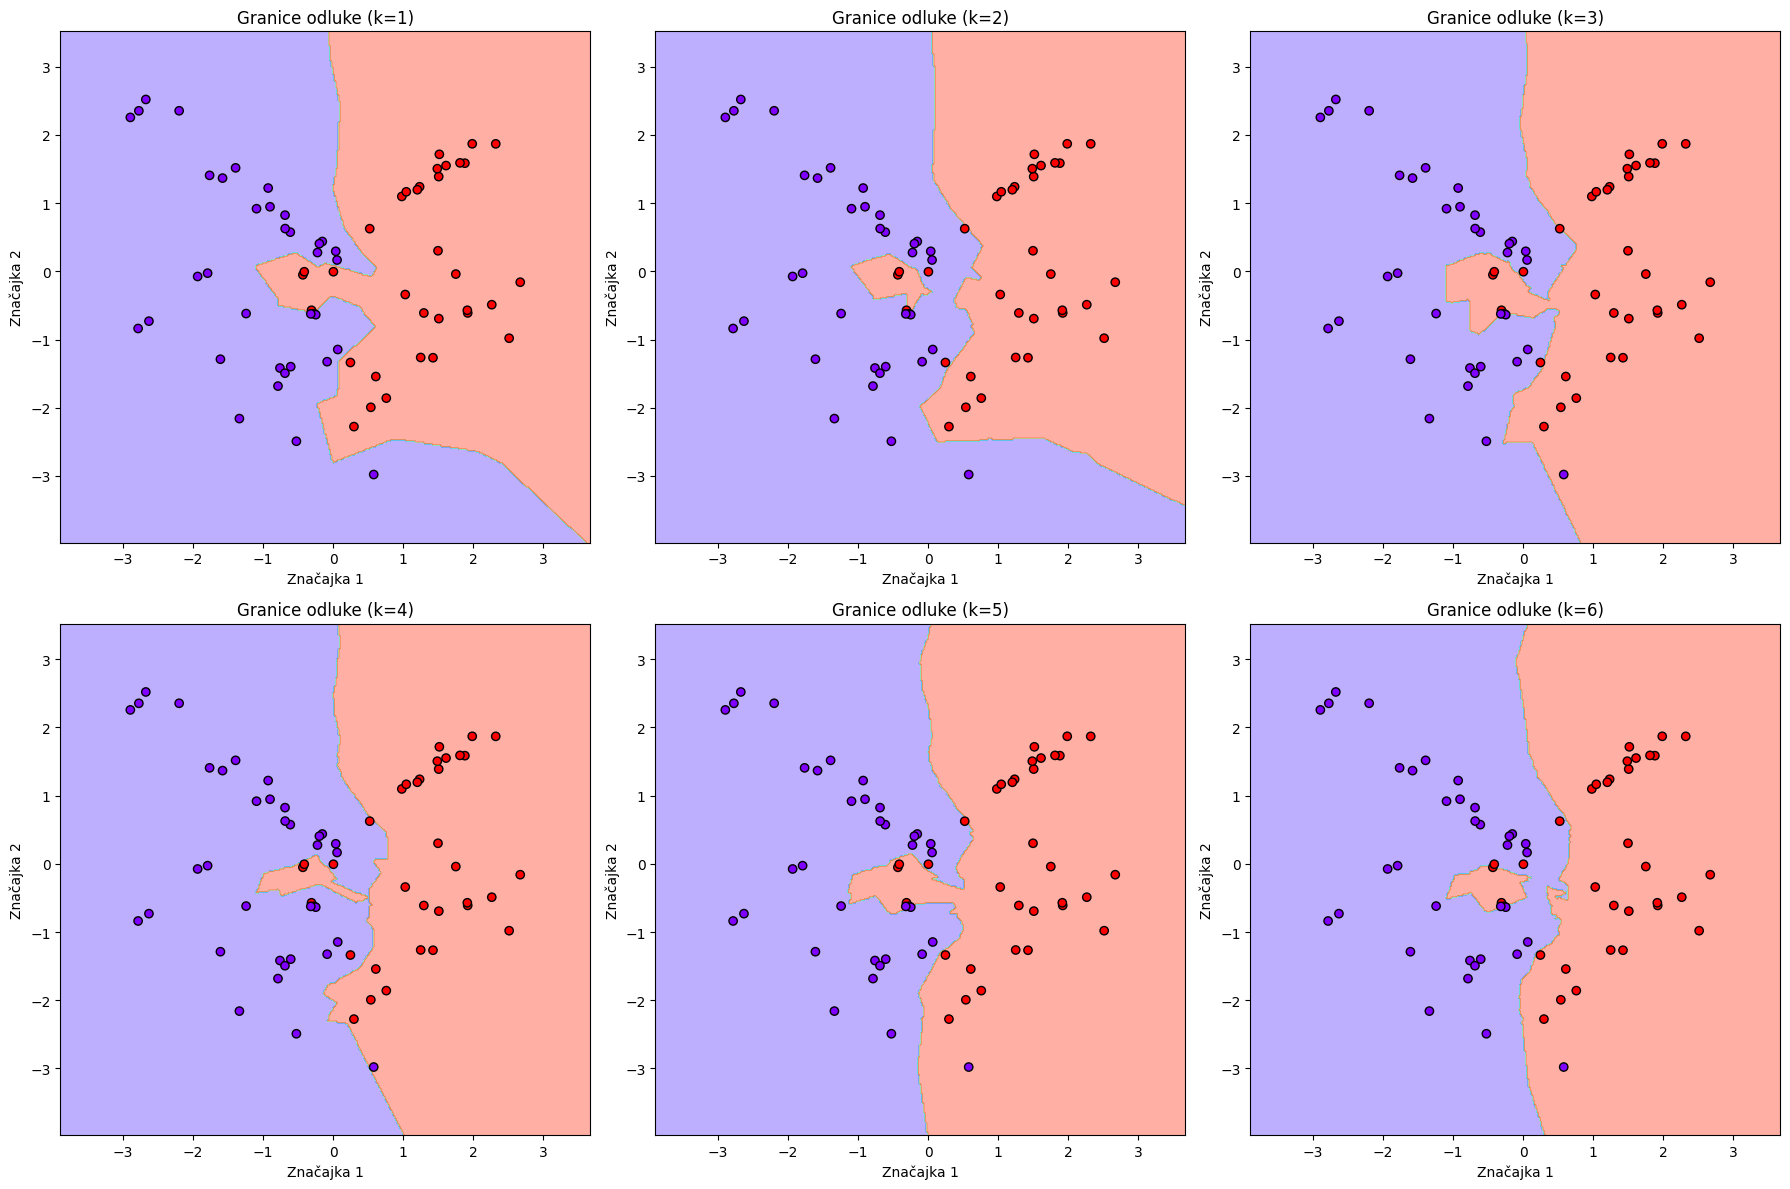

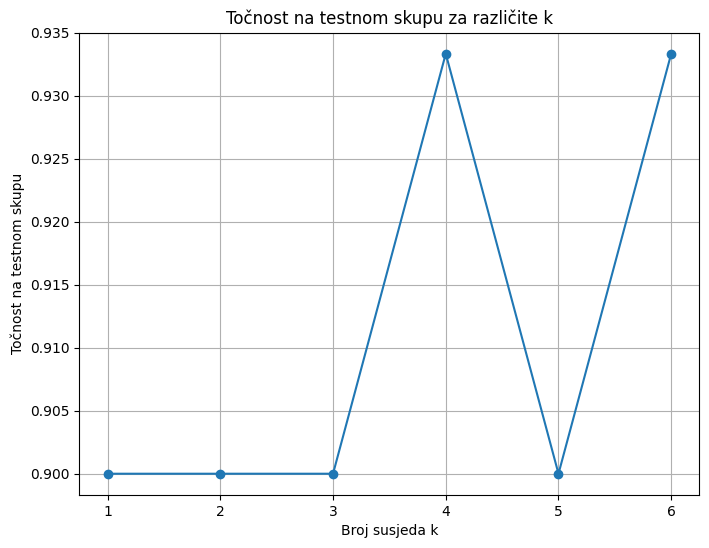

Najbolji k prema točnosti na testnom skupu: 4
Točnost na testnom skupu s najboljim k: 0.933


In [23]:

X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=2,
                           n_classes=2, random_state=412)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=412, stratify=y)

k_values = range(1, 7)
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_scores.append(knn.score(X_test, y_test))

best_k = k_values[np.argmax(test_scores)]

plt.figure(figsize=(18, 12))

for i, k in enumerate(k_values, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plt.subplot(2, 3, i)
    plot_decision_boundaries(X_train, y_train, knn, title=f"Granice odluke (k={k})")

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(k_values, test_scores, marker='o')
plt.title("Točnost na testnom skupu za različite k")
plt.xlabel("Broj susjeda k")
plt.ylabel("Točnost na testnom skupu")
plt.xticks(k_values)
plt.grid(True)
plt.show()

print(f"Najbolji k prema točnosti na testnom skupu: {best_k}")
print(f"Točnost na testnom skupu s najboljim k: {test_scores[np.argmax(test_scores)]:.3f}")


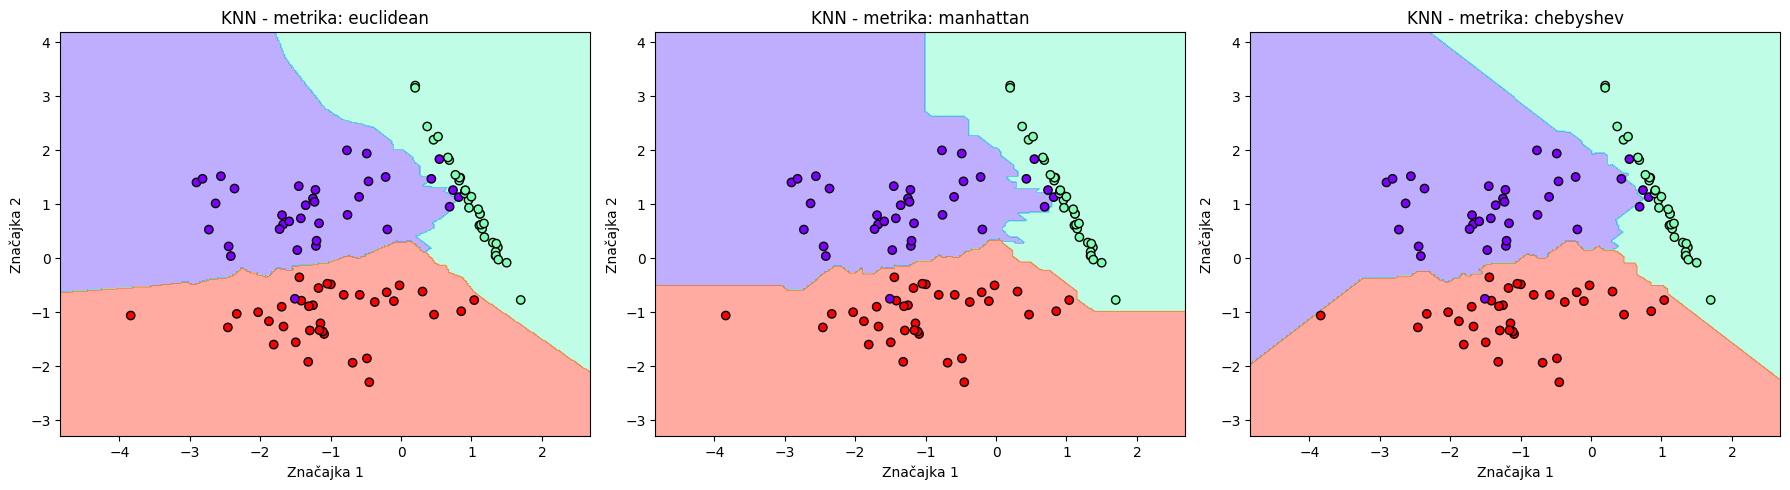

In [25]:

X, y = make_classification(n_samples=150, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           n_classes=3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify=y)

distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

plt.figure(figsize=(18, 5))

for i, metric in enumerate(distance_metrics, 1):
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    plt.subplot(1, 3, i)
    plot_decision_boundaries(X_train, y_train, knn, title=f"KNN - metrika: {metric}")

plt.tight_layout()
plt.show()
